In [51]:
import os
import pandas as pd
import numpy as np

# Variables
manu = 0

# Set working directory if manu is 1
if manu==1:
    os.chdir('C:/Users/manue/Dropbox/Research/ME project/Code/Empirics/SDC')
else:
    os.chdir('C:/Users/Elena Vollmer/Dropbox/ME project/Code/Empirics/SDC')

# Read data from Excel and CSV files
bond_data = pd.read_excel("input/bond_issuance_all.xlsx", sheet_name="data", skiprows=2)
clean_bond_data = pd.read_csv("input/bond_data_clean.csv")
crsp_data = pd.read_csv('input/crsp_data.csv')

# Extract unique CUSIPs
cusips_bond_data = clean_bond_data['Issuer/Borrower Ultimate Parent 6-digit CUSIP'].unique()
cusips_crsp_data = crsp_data['cusip'].unique()

# Data transformation

In [52]:
# Save unique CUSIPs to CSV and text files
pd.DataFrame(cusips_bond_data).to_csv('output/cusips_crsp_6igits.csv', index=False, header=False)


In [14]:
# Save unique CUSIPs to CSV and text files
pd.DataFrame(cusips_crsp_data).to_csv('output/cusips_crsp_digits.csv', index=False, header=False)

# Make a text file
cusips_crsp_data = [str(cusip) + '\n' for cusip in cusips_crsp_data]
with open('output/cusips_crsp.txt', 'w') as f:
    f.writelines(cusips_crsp_data)

In [49]:
# transform cuspis bond data into a list

cusips_bond_data = [str(cusip) + '\n' for cusip in cusips_bond_data]
with open('output/cusips_bond.txt', 'w') as f:
    f.writelines(cusips_bond_data)

# Save as an excel file 
pd.DataFrame(cusips_bond_data).to_excel('output/cusips_bond_8digits.xlsx', index=False, header=False)

In [45]:
# load the data first row is the header as excel fike
cusips_bond_data = pd.read_excel('output/cusips_bond_8digits.xlsx')

cusips_bond_data = pd.DataFrame(cusips_bond_data)
cusips_bond_data.columns = ['CUSIP']


# Remove spaces from CUSIP values and convert to string
cusips_bond_data['CUSIP'] = cusips_bond_data['CUSIP'].astype(str).str.replace(' ', '').str.strip()

# Append '10' to each CUSIP
cusips_bond_data['CUSIP'] = cusips_bond_data['CUSIP'] + '10'


# Convert the DataFrame column to a list of strings with newline characters
cusips_bond_data_list = [str(cusip) + '\n' for cusip in cusips_bond_data['CUSIP'].tolist()]

# Write the list of strings to a text file
with open('output/cusips_bond.txt', 'w') as f:
    f.writelines(cusips_bond_data_list)

In [50]:
# read in 9 digit cusips from csv
cusips_9digits = pd.read_csv('output/cusips_9digits.csv')

cusips_9digits = [str(cusip) + '\n' for cusip in cusips_9digits]
with open('output/cusips_9digits.txt', 'w') as f:
    f.writelines(cusips_9digits)


In [3]:
# Read and modify CUSIP translation data
cusips_translation = pd.read_csv('input/cusip_translation.csv')
cusips_translation['orig'] = cusips_crsp_data

# rename cusip to new_cusip
cusips_translation = cusips_translation.rename(columns={'cusip': 'new_cusip'})

# Save the modified CUSIP translation
cusips_translation.to_csv("output/dict_cusips.csv", index=False)


In [4]:
print(crsp_data['cusip'])

0           36720410
1           05978R10
2           39031810
3           95815510
4           46334710
              ...   
52686767    92835K10
52686768    G3323L10
52686769    12503M10
52686770    78513510
52686771    88160R10
Name: cusip, Length: 52686772, dtype: object


In [5]:
# Remove newline characters from the 'orig' column in cusips_translation
cusips_translation['orig'] = cusips_translation['orig'].str.strip()
crsp_data['cusip'] = crsp_data['cusip'].astype(str).str.strip()

# Verify the changes
print(cusips_translation['orig'].head())

KeyboardInterrupt: 

In [10]:
# Perform the merge operation
cusips_data_merged = pd.merge(crsp_data, cusips_translation[['orig', 'new_cusip']], left_on='cusip', right_on='orig', how='left')

# Optionally, if you want to drop the 'orig' column after merge
cusips_data_merged.drop(columns=['orig'], inplace=True)

In [11]:
# change order into date, ret , retx, cusip and new_cusip
cusips_data_merged = cusips_data_merged[['date', 'ret', 'retx', 'cusip', 'new_cusip']]

# Compute Annualized returns

In [12]:
cusips_data_merged['date'] = pd.to_datetime(cusips_data_merged['date'])
cusips_data_merged['year'] = cusips_data_merged['date'].dt.year

cusips_data_merged.to_csv("output/cusips_data_merged.csv", index=False)

# Annualized_returns now contains yearly annualized returns for all cusips
# Group by 'cusip' and 'year' to calculate annualized returns for each cusip
annualized_returns = cusips_data_merged.groupby(['new_cusip', 'year']).agg({
    'ret': lambda x: (1 + x).prod() - 1,  # Annualized return for returns 'ret'
    'retx': lambda x: (1 + x).prod() - 1,  # Annualized return for returns without dividends 'retx'
}).reset_index()


KeyboardInterrupt: 

In [ ]:

cusips_data_merged.to_csv("output/cusips_data_merged.csv", index=False)


In [ ]:

# Annualized_returns now contains yearly annualized returns for all cusips
# Group by 'cusip' and 'year' to calculate annualized returns for each cusip
annualized_returns = cusips_data_merged.groupby(['new_cusip', 'year']).agg({
    'ret': lambda x: (1 + x).prod() - 1,  # Annualized return for returns 'ret'
    'retx': lambda x: (1 + x).prod() - 1,  # Annualized return for returns without dividends 'retx'
}).reset_index()


In [ ]:
# Calculate the dividend yield for each cusip and year
annualized_returns['dividend_yield'] = ((1 + annualized_returns['ret']) / (1 + annualized_returns['retx'])) - 1
#annualized_returns['log_dividend_yield'] = np.log(annualized_returns['dividend_yield'])

# Now if the dividend yield is 0 then replace the 0 with the ret value in the same row
#annualized_returns.loc[annualized_returns['dividend_yield'] == 0, 'dividend_yield'] = annualized_returns['ret']

# Now calculate the log dividend yield
annualized_returns['log_dividend_yield'] = np.log(annualized_returns['dividend_yield'])

c:\Users\manue\anaconda3\lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [ ]:
# replace inf with 0
#annualized_returns = annualized_returns.replace([np.inf, -np.inf], 0)

In [ ]:
# Save the annualized returns to a CSV file
annualized_returns.to_csv("output/annualized_returns.csv", index=False)

# Match dividend yields to bond yields

In [9]:
# Import annualized returns 
annualized_returns = pd.read_csv("output/annualized_returns.csv")

In [10]:
# Merge clean_bond data on 6-digit CUSIP and year
merged_data = pd.merge(
    clean_bond_data,
    annualized_returns,
    left_on=['Issuer/Borrower Ultimate Parent 6-digit CUSIP', 'Year'],
    right_on=['new_cusip', 'year'],
    how='left'
)
# remove the unnamed column
merged_data = merged_data.loc[:, ~merged_data.columns.str.contains('^Unnamed')]

# put new_cusip next to the column Issuer/Borrower Ultimate Parent 6-digit CUSIP
merged_data = merged_data[['Issuer/Borrower Ultimate Parent 6-digit CUSIP', 'new_cusip'] + [col for col in merged_data.columns if col not in ['Issuer/Borrower Ultimate Parent 6-digit CUSIP', 'new_cusip']]]

# make new file: final_merged_data with all new_cusips not NaN
final_merged_data = merged_data[merged_data['new_cusip'].notna()]
# Multiply ret by 100
final_merged_data['ret'] = final_merged_data['ret'] * 100
final_merged_data = final_merged_data.dropna(subset=['ret'])
final_merged_data = final_merged_data.drop_duplicates(subset=['ret'])


c:\Users\Elena Vollmer\anaconda3\envs\myenv\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


# Make graphs

In [11]:
eme_countries = ["Argentina", "Azerbaijan", "Bahrain", "Belarus", "Brazil", "Bulgaria", "Chile",
    "China (Mainland)", "Colombia", "Costa Rica", "Croatia", "Cyprus", "Czech Republic",
    "Dominican Republic", "Ecuador", "Egypt", "El Salvador", "Georgia", "Ghana",
    "Guatemala", "Hungary", "India", "Indonesia", "Israel", "Jamaica", "Kazakhstan",
    "Kuwait", "Laos", "Latvia", "Lebanon", "Malaysia", "Mexico", "Mongolia", "Morocco",
    "Nigeria", "Oman", "Pakistan", "Panama", "Paraguay", "Peru", "Philippines", 
    "Poland", "Puerto Rico","Qatar", "Romania", "Russia", "Saudi Arabia", "Serbia", "Slovakia", 
    "Slovenia", "South Africa", "South Korea", "Sri Lanka", "Taiwan", "Thailand", 
    "Trinidad and Tobago", "Turkey", "Ukraine", "United Arab Emirates", "Uruguay", 
    "Venezuela", "Vietnam", "Zambia"
]

tax_havens = ["Bahamas", "Bermuda", "British Virgin Islands", "Cayman Islands", "Guernsey",
    "Hong Kong", "Isle of Man", "Jersey", "Liechtenstein", "Luxembourg", "Malta",
    "Monaco", "Netherlands Antilles"]

developed_countries = [
    "Australia",
    "Austria",
    "Belgium",
    "Canada",
    "Denmark",
    "Finland",
    "France",
    "Germany",
    "Greece",
    "Hong Kong",
    "Iceland",
    "Ireland",
    "Italy",
    "Japan",
    "Netherlands",
    "New Zealand",
    "Norway",
    "Portugal",
    "Spain",
    "Singapore",
    "Sweden",
    "Switzerland",
    "United Kingdom",
    "United States"
]


In [12]:
# Map the countries to their respective currencies for the eme countries using the eme_currencies list
eme_country_currency = {
    'Argentina': 'Argentine Peso',
    'Azerbaijan': 'Azerbaijani Manat',
    'Bahrain': 'Bahraini Dinar',
    'Belarus': 'Belarusian Ruble',
    'Brazil': 'Brazilian Real',
    'Bulgaria': 'Bulgarian Lev',
    'Chile': 'Chilean Peso',
    'China (Mainland)': 'Chinese Yuan Renminbi',
    'Colombia': 'Colombian Peso',
    'Costa Rica': 'Costa Rican Colon',
    'Croatia': 'Croatian Kuna',
    'Cyprus': 'Cypriot Pound',
    'Czech Republic': 'Czech Koruna',
    'Dominican Republic': 'Dominican Peso',
    'Ecuador': 'Ecuadorian Sucre',
    'Egypt': 'Egyptian Pound',
    'El Salvador': 'Salvadoran Colon',
    'Georgia': 'Georgian Lari',
    'Ghana': 'Ghanaian Cedi',
    'Guatemala': 'Guatemalan Quetzal',
    'Hungary': 'Hungarian Forint',
    'India': 'Indian Rupee',
    'Indonesia': 'Indonesian Rupiah',
    'Israel': 'New Israeli Shekel',
    'Jamaica': 'Jamaican Dollar',
    'Kazakhstan': 'Kazakhstani Tenge',
    'Kuwait': 'Kuwaiti Dinar',
    'Laos': 'Laotian Kip',
    'Latvia': 'Latvian Lats',
    'Lebanon': 'Lebanese Pound',
    'Malaysia': 'Malaysian Ringgit',
    'Mexico': 'Mexican Peso',
    'Mongolia': 'Mongolian Tugrik',
    'Morocco': 'Moroccan Dirham',
    'Nigeria': 'Nigerian Naira',
    'Oman': 'Omani Rial',
    'Pakistan': 'Pakistani Rupee',
    'Panama': 'Panamanian Balboa',
    'Paraguay': 'Paraguayan Guarani',
    'Peru': 'Peruvian Nuevo Sol',
    'Philippines': 'Philippine Peso',
    'Poland': 'Polish New Zloty',
    'Puerto Rico': 'Puerto Rican Peso',
    'Qatar': 'Qatari Rial',
    'Romania': 'Romanian Leu',
    'Russia': 'Russian New Ruble',
    'Saudi Arabia': 'Saudi Riyal',
    'Serbia': 'Serbian Dinar',
    'Slovakia': 'Slovak Koruna',
    'Slovenia': 'Slovenian Tolar',
    'South Africa': 'South African Rand',
    'South Korea': 'South Korean Won',
    'Sri Lanka': 'Sri Lankan Rupee',
    'Taiwan': 'Taiwan Dollar (New)',
    'Thailand': 'Thai Baht',
    'Trinidad and Tobago': 'Trinidad and Tobago Dollar',
    'Turkey': 'Turkish Lira (New)',
    'Ukraine': 'Ukrainian Hryvnia',
    'United Arab Emirates': 'UAE Dirham',
    'Uruguay': 'Uruguayan Peso',
    'Venezuela': 'Venezuelan Bolivar',
    'Vietnam': 'Vietnamese Dong',
    'Zambia': 'Zambian Kwacha'
}
# Repeat the same for developed countries:, map the countries to their respective currencies for the dev countries using the dev_currencies list
dev_country_currency = {
    'Australia': 'Australian Dollar',
    'Austria': 'Austrian Schilling',
    'Belgium': 'Belgian Franc',
    'Canada': 'Canadian Dollar',
    'Denmark': 'Danish Krone',
    'Finland': 'Finnish Markka',
    'France': 'French Franc',
    'Germany': 'Deutsche Mark',
    'Greece': 'Greek Drachma',
    'Hong Kong': 'Hong Kong Dollar',
    'Iceland': 'Iceland Krona',
    'Ireland': 'Great Britain Pound',
    'Italy': 'Italian Lira',
    'Japan': 'Japanese Yen',
    'Netherlands': 'Netherlands Guilder',
    'New Zealand': 'New Zealand Dollar',
    'Norway': 'Norwegian Krone',
    'Portugal': 'Portuguese Escudo',
    'Spain': 'Spanish Peseta',
    'Singapore': 'Singapore Dollar',
    'Sweden': 'Swedish Krona',
    'Switzerland': 'Swiss Franc',
    'United Kingdom': 'Great Britain Pound',
    'United States': 'U.S. Dollar', 
    'Euro': 'Euro'
}
# Repeat the same for tax haven countries:, map the countries to their respective currencies for the tax countries using the tax_currencies list
tax_country_currency = {
    'Bahamas': 'Bahamian Dollar',
    'Bermuda': 'Bermudian Dollar',
    'British Virgin Islands': 'British Virgin Islands Dollar',
    'Cayman Islands': 'Cayman Islands Dollar',
    'Guernsey': 'Guernsey Pound',
    'Hong Kong': 'Hong Kong Dollar',
    'Isle of Man': 'Isle Man Pound',
    'Jersey': 'Jersey Pound',
    'Liechtenstein': 'Liechtenstein Franc',
    'Luxembourg': 'Luxembourg Franc',
    'Malta': 'Maltese Lira',
    'Monaco': 'Monaco Franc',
    'Netherlands Antilles': 'Netherlands Antilles Guilder'
}

In [13]:
eme_data = final_merged_data[final_merged_data["Issuer/Borrower Ultimate Parent Nation"].isin(eme_countries)]
dev_data = final_merged_data[final_merged_data["Issuer/Borrower Ultimate Parent Nation"].isin(developed_countries)]
tax_data = final_merged_data[final_merged_data["Issuer/Borrower Ultimate Parent Nation"].isin(tax_havens)]

In [14]:
# For the eme_data make a new column with a flag foreign_market which is True if the market area is not "Domestic"
eme_data["Foreign Market"] = eme_data["Market Area"] != "Domestic"
dev_data["Foreign Market"] = dev_data["Market Area"] != "Domestic"
tax_data["Foreign Market"] = tax_data["Market Area"] != "Domestic"

c:\Users\Elena Vollmer\anaconda3\envs\myenv\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
c:\Users\Elena Vollmer\anaconda3\envs\myenv\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
c:\Users\Elena Vollmer\anaconda3\envs\myenv\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

In [15]:
# For the eme_data make a new column with a flag foreign_currency which is True if the currency is not equal to the country's currency and False otherwise
eme_data["Foreign Currency"] = eme_data.apply(lambda x: x["Denominations Currency"] != eme_country_currency[x["Issuer/Borrower Ultimate Parent Nation"]], axis=1)
dev_data["Foreign Currency"] = dev_data.apply(lambda x: x["Denominations Currency"] != dev_country_currency[x["Issuer/Borrower Ultimate Parent Nation"]], axis=1)
tax_data["Foreign Currency"] = tax_data.apply(lambda x: x["Denominations Currency"] != tax_country_currency[x["Issuer/Borrower Ultimate Parent Nation"]], axis=1)

c:\Users\Elena Vollmer\anaconda3\envs\myenv\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
c:\Users\Elena Vollmer\anaconda3\envs\myenv\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
c:\Users\Elena Vollmer\anaconda3\envs\myenv\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

In [16]:
# Description of the eme_data 
eme_domestic = eme_data[eme_data["Foreign Market"] == False]
eme_cross_border = eme_data[eme_data["Foreign Market"] == True]

# Calculate the average yield per year for the domestic and cross-border markets
eme_domestic_yield = eme_domestic.groupby('Year')['Yield As Stated'].mean()
eme_cross_border_yield = eme_cross_border.groupby('Year')['Yield As Stated'].mean()

# Calculate the average return per year for the domestic and cross-border markets
eme_domestic_return = eme_domestic.groupby('Year')['ret'].mean()
eme_cross_border_return = eme_cross_border.groupby('Year')['ret'].mean()

# Print for me to see the values of the yield and return for some observations, like the first 5

# Print summary statistics of the two dataframes
print(eme_cross_border_return.describe())
print(eme_cross_border_yield.describe())

count     21.000000
mean      11.125146
std       69.342998
min      -94.552861
25%      -11.180673
50%        4.682932
75%       11.520224
max      281.408762
Name: ret, dtype: float64
count    21.000000
mean      6.745698
std       2.705911
min       2.862500
25%       4.914500
50%       5.860000
75%       9.266333
max      13.750000
Name: Yield As Stated, dtype: float64


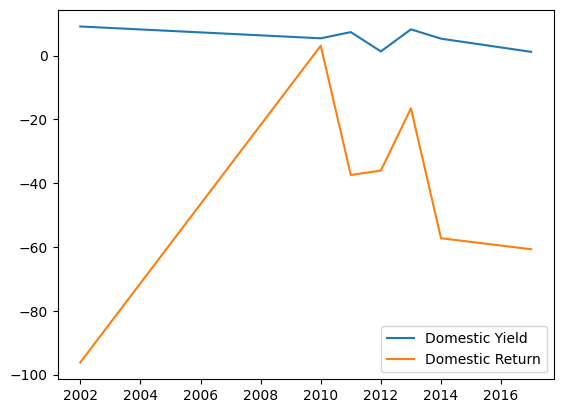

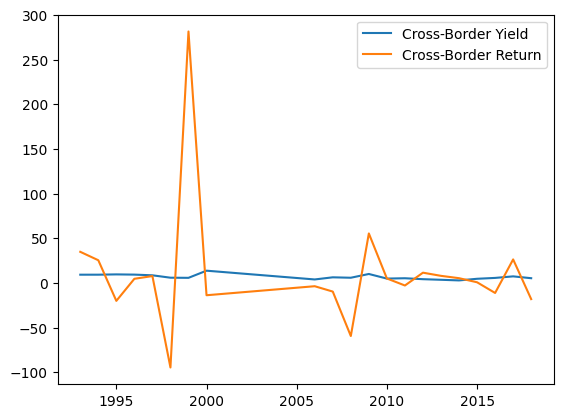

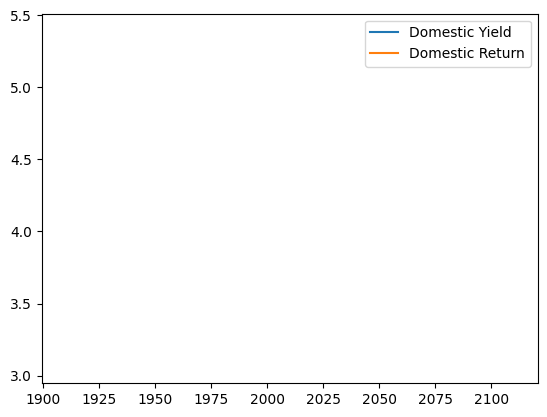

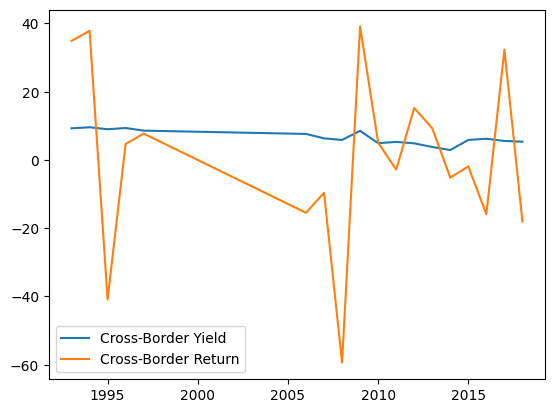

In [17]:

# Plot the average yield and return for domestic over years in one graph with two lines
import matplotlib.pyplot as plt
plt.plot(eme_domestic_yield, label='Domestic Yield')
plt.plot(eme_domestic_return, label='Domestic Return')
plt.legend()            
########plt.title('Emerging market domestic issuances: bond yields vs. equity returns')
plt.savefig('output/eme_domestic_yield_return.png')
plt.show()


# Plot the same for cross-border
plt.plot(eme_cross_border_yield, label='Cross-Border Yield')
plt.plot(eme_cross_border_return, label='Cross-Border Return')
plt.legend()
##plt.title('Emerging market cross-border issuances: bond yields vs. equity returns')
plt.savefig('output/eme_cross_border_yield_return.png')
plt.show()


# Do the same as above, but now also filtering Denominations Currency=U.S. Dollar for the eme_data, now naming things the same but with usd at the end
eme_data_usd = eme_data[eme_data["Denominations Currency"] == "U.S. Dollar"]
eme_domestic_usd = eme_data_usd[eme_data_usd["Foreign Market"] == False]
eme_cross_border_usd = eme_data_usd[eme_data_usd["Foreign Market"] == True]

# Now, redo the two plots above for the usd data
eme_domestic_yield_usd = eme_domestic_usd.groupby('Year')['Yield As Stated'].mean()
eme_cross_border_yield_usd = eme_cross_border_usd.groupby('Year')['Yield As Stated'].mean()
eme_domestic_return_usd = eme_domestic_usd.groupby('Year')['ret'].mean()
eme_cross_border_return_usd = eme_cross_border_usd.groupby('Year')['ret'].mean()

# Now, the plots
plt.plot(eme_domestic_yield_usd, label='Domestic Yield')
plt.plot(eme_domestic_return_usd, label='Domestic Return')
plt.legend()
##plt.title('Emerging market domestic issuances in USD: bond yields vs. equity returns')
plt.savefig('output/eme_domestic_yield_return_usd.png')
plt.show()

# And the other one
plt.plot(eme_cross_border_yield_usd, label='Cross-Border Yield')
plt.plot(eme_cross_border_return_usd, label='Cross-Border Return')
plt.legend()
##plt.title('Emerging market cross-border issuances in USD: bond yields vs. equity returns')
plt.savefig('output/eme_cross_border_yield_return_usd.png')
plt.show()


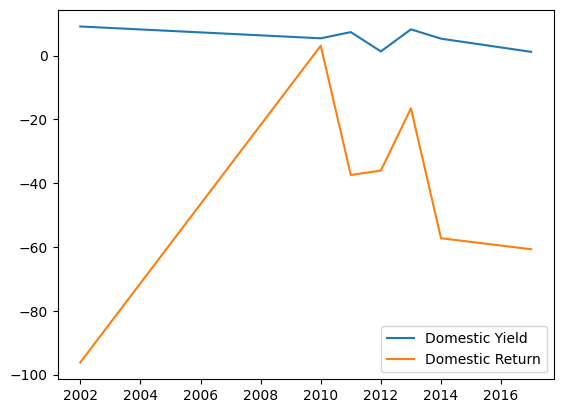

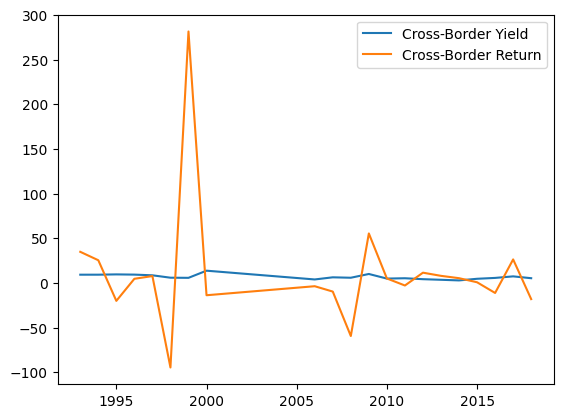

In [18]:
# Calculate the average yield per year for the domestic and cross-border markets
eme_domestic_yield = eme_domestic.groupby('Year')['Yield As Stated'].mean()
eme_cross_border_yield = eme_cross_border.groupby('Year')['Yield As Stated'].mean()

# Calculate the average return per year for the domestic and cross-border markets
eme_domestic_return = eme_domestic.groupby('Year')['ret'].mean()
eme_cross_border_return = eme_cross_border.groupby('Year')['ret'].mean()

# Plot the average yield and return for domestic over years in one graph with two lines
import matplotlib.pyplot as plt
plt.plot(eme_domestic_yield, label='Domestic Yield')
plt.plot(eme_domestic_return, label='Domestic Return')
plt.legend()            
##plt.title('Emerging market domestic issuances: bond yields vs. equity returns')
plt.savefig('output/eme_domestic_yield_return.png')
plt.show()


# Plot the same for cross-border
plt.plot(eme_cross_border_yield, label='Cross-Border Yield')
plt.plot(eme_cross_border_return, label='Cross-Border Return')
plt.legend()
##plt.title('Emerging market cross-border issuances: bond yields vs. equity returns')
plt.savefig('output/eme_cross_border_yield_return.png')
plt.show()



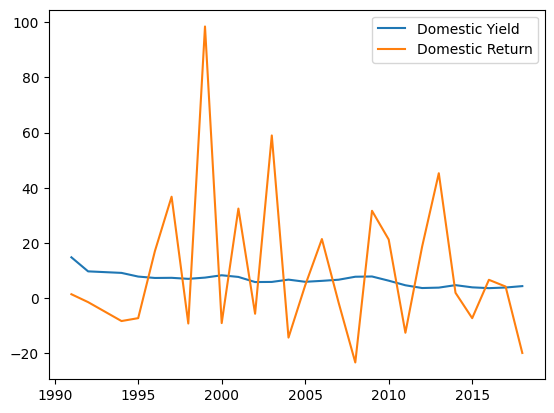

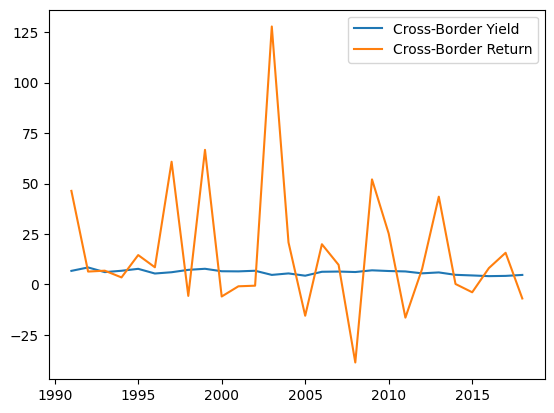

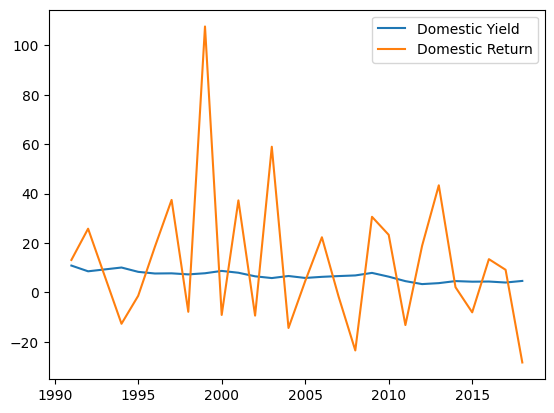

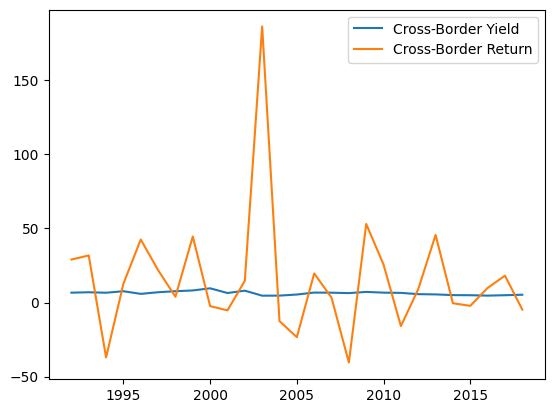

In [19]:
# Repeat the same for developed countries
dev_domestic = dev_data[dev_data["Foreign Market"] == False]
dev_cross_border = dev_data[dev_data["Foreign Market"] == True]

# Calculate the average yield per year for the domestic and cross-border markets
dev_domestic_yield = dev_domestic.groupby('Year')['Yield As Stated'].mean()
dev_cross_border_yield = dev_cross_border.groupby('Year')['Yield As Stated'].mean()

# Calculate the average return per year for the domestic and cross-border markets
dev_domestic_return = dev_domestic.groupby('Year')['ret'].mean()
dev_cross_border_return = dev_cross_border.groupby('Year')['ret'].mean()

# Plot the average yield and return for domestic over years in one graph with two lines
plt.plot(dev_domestic_yield, label='Domestic Yield')
plt.plot(dev_domestic_return, label='Domestic Return')
plt.legend()
#plt.title('Developed market domestic issuances: bond yields vs. equity returns')
plt.savefig('output/dev_domestic_yield_return.png')
plt.show()

# Plot the same for cross-border
plt.plot(dev_cross_border_yield, label='Cross-Border Yield')
plt.plot(dev_cross_border_return, label='Cross-Border Return')
plt.legend()
#plt.title('Developed market cross-border issuances: bond yields vs. equity returns')
plt.savefig('output/dev_cross_border_yield_return.png')
plt.show()

# Redo the above for USD data
dev_data_usd = dev_data[dev_data["Denominations Currency"] == "U.S. Dollar"]
dev_domestic_usd = dev_data_usd[dev_data_usd["Foreign Market"] == False]
dev_cross_border_usd = dev_data_usd[dev_data_usd["Foreign Market"] == True]
#Now, the rest
dev_domestic_yield_usd = dev_domestic_usd.groupby('Year')['Yield As Stated'].mean()
dev_cross_border_yield_usd = dev_cross_border_usd.groupby('Year')['Yield As Stated'].mean()
dev_domestic_return_usd = dev_domestic_usd.groupby('Year')['ret'].mean()
dev_cross_border_return_usd = dev_cross_border_usd.groupby('Year')['ret'].mean()

# Now, the plots
plt.plot(dev_domestic_yield_usd, label='Domestic Yield')
plt.plot(dev_domestic_return_usd, label='Domestic Return')
plt.legend()
#plt.title('Developed market domestic issuances in USD: bond yields vs. equity returns')
plt.savefig('output/dev_domestic_yield_return_usd.png')
plt.show()

# And the other one
plt.plot(dev_cross_border_yield_usd, label='Cross-Border Yield')
plt.plot(dev_cross_border_return_usd, label='Cross-Border Return')
plt.legend()
#plt.title('Developed market cross-border issuances in USD: bond yields vs. equity returns')
plt.savefig('output/dev_cross_border_yield_return_usd.png')
plt.show()

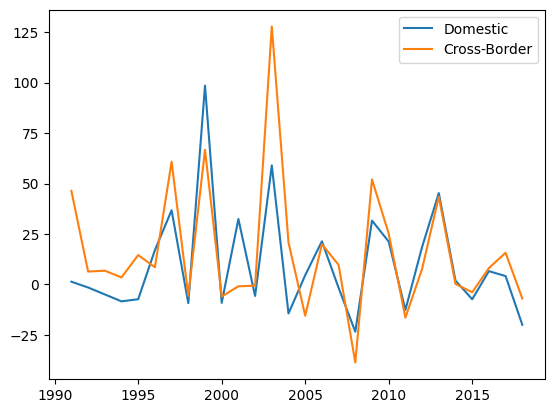

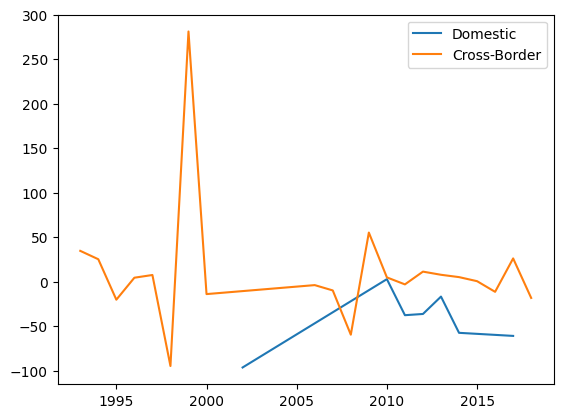

In [20]:
# Plot equity returns for developed countries, for firms that issue in domestic and foreign markets
plt.plot(dev_domestic_return, label='Domestic')
plt.plot(dev_cross_border_return, label='Cross-Border')
plt.legend()
#plt.title('Equity returns for firm in developed countries, by market of issuance')
plt.savefig('output/dev_equity_returns.png')
plt.show()

# The same, but for emerging markets
plt.plot(eme_domestic_return, label='Domestic')
plt.plot(eme_cross_border_return, label='Cross-Border')
plt.legend()
#plt.title('Equity returns for firm in emerging markets, by market of issuance')
plt.savefig('output/eme_equity_returns.png')
plt.show()

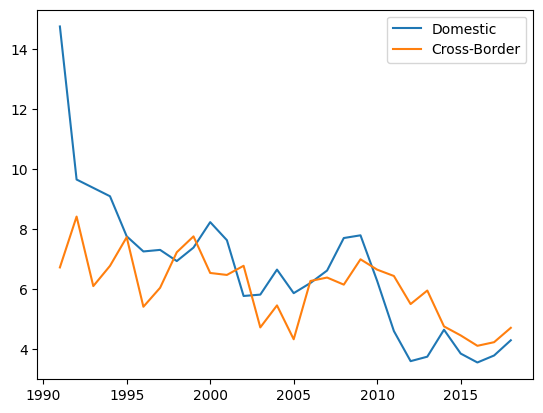

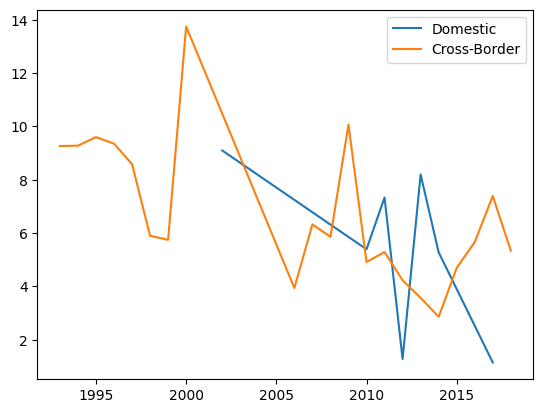

In [21]:
# Plot bond yields returns for developed countries, for firms that issue in domestic and foreign markets
plt.plot(dev_domestic_yield, label='Domestic')
plt.plot(dev_cross_border_yield, label='Cross-Border')
plt.legend()
#plt.title('Bond yields for firm in developed countries, by market of issuance')
plt.savefig('output/dev_bond_yields.png')
plt.show()


# The same, but for emerging markets
plt.plot(eme_domestic_yield, label='Domestic')
plt.plot(eme_cross_border_yield, label='Cross-Border')
plt.legend()
#plt.title('Bond yields for firm in emerging markets, by market of issuance')
plt.savefig('output/eme_bond_yields.png')
plt.show()


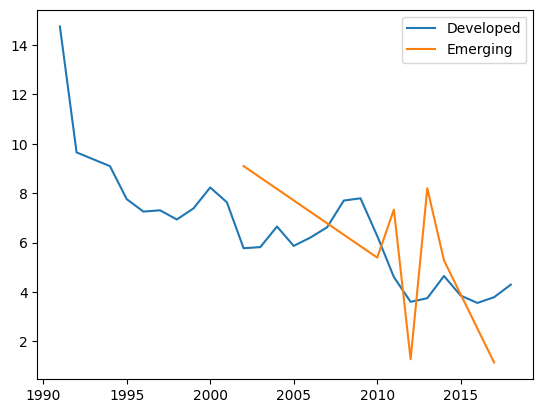

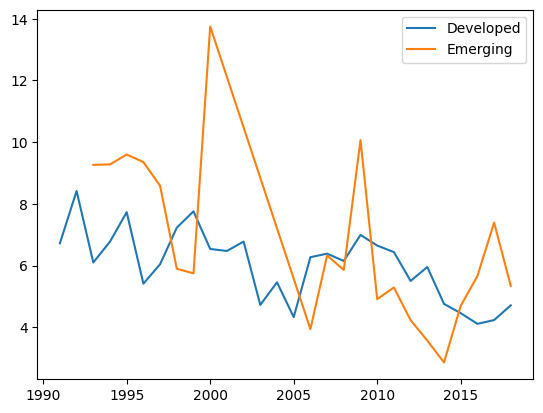

In [22]:
# Make a plot for domestic issuances in dev vs emerging markets 
plt.plot(dev_domestic_yield, label='Developed')
plt.plot(eme_domestic_yield, label='Emerging')
plt.legend()
#plt.title('Bond yields for domestic issuances in developed vs emerging markets')
plt.savefig('output/dev_eme_domestic_yield.png')
plt.show()

# Make a plot for cross-border issuances in dev vs emerging markets
plt.plot(dev_cross_border_yield, label='Developed')
plt.plot(eme_cross_border_yield, label='Emerging')
plt.legend()
#plt.title('Bond yields for cross-border issuances in developed vs emerging markets')
plt.savefig('output/dev_eme_cross_border_yield.png')
plt.show()


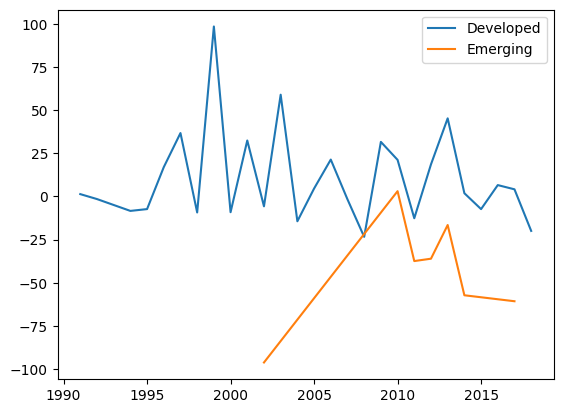

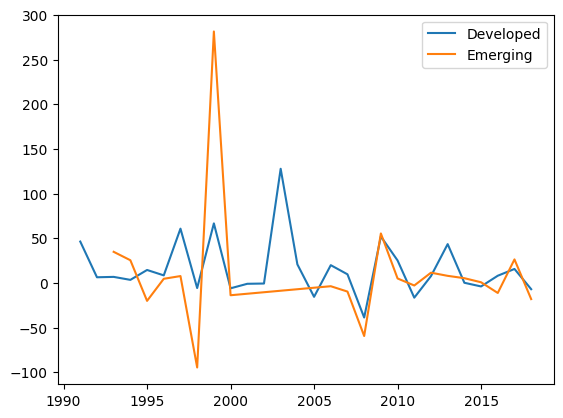

In [23]:
# Make same for equity returns
plt.plot(dev_domestic_return, label='Developed')
plt.plot(eme_domestic_return, label='Emerging')
plt.legend()
#plt.title('Equity returns for domestic issuances in developed vs emerging markets')
plt.savefig('output/dev_eme_domestic_return.png')
plt.show()

# Make a plot for cross-border issuances in dev vs emerging markets
plt.plot(dev_cross_border_return, label='Developed')
plt.plot(eme_cross_border_return, label='Emerging')
plt.legend()
#plt.title('Equity returns for cross-border issuances in developed vs emerging markets')
plt.savefig('output/dev_eme_cross_border_return.png')
plt.show()